# Init

In [ ]:
import yaml
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import (solve_ivp,
                             ode)
from plasmistry import constants as const
from plasmistry.molecule import get_vib_energy

In [2]:
from plasmistry.reactions import CoefReactions

In [3]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 14

In [ ]:
from yaml_demo import (eval_constructor, LT_constructor, Arr_constructor,
                       H2_vib_energy_in_eV, 
                       CO2_vib_energy_in_eV, 
                       CO_vib_energy_in_eV,
                       Reaction_block,
                       Cros_Reaction_block,
                       Coef_Reaction_block)

yaml.add_constructor(u"!eval", eval_constructor)
yaml.add_constructor(u"!LT", LT_constructor)
yaml.add_constructor(u"!Arr", Arr_constructor)

# Read reactions

In [6]:
with open("test_0.yaml") as f:
    all_rctns = yaml.load(f)
rctn_considered = all_rctns[-1]['The reactions considered']['electron reactions']
for _key in rctn_considered:
    print(_key)

H2_ele_vib_rctn_forward
H2_ele_vib_rctn_backward
CO2_VT_with_CO2


In [7]:
coef_block = Coef_Reaction_block(rctn_dict=rctn_considered["CO2_VT_with_CO2"])

In [8]:
coef_df = coef_block.generate_crostn_dataframe()

In [9]:
coef_df.columns

Index(['formula', 'reactant', 'product', 'type', 'kstr'], dtype='object')

# Instance reaction
- \__init__
- .set_pre_exec_list() (optional)
- .compile_k_str()








In [10]:
coef = CoefReactions(reactant=coef_df['reactant'],
                    product=coef_df['product'],
                    k_str=coef_df['kstr'])

In [11]:
print(coef)


        
====SPECIES====
        
0           CO
1       CO(v1)
2      CO(v10)
3       CO(v2)
4       CO(v3)
5       CO(v4)
6       CO(v5)
7       CO(v6)
8       CO(v7)
9       CO(v8)
10      CO(v9)
11         CO2
12     CO2(v1)
13    CO2(v10)
14    CO2(v11)
15    CO2(v12)
16    CO2(v13)
17    CO2(v14)
18    CO2(v15)
19    CO2(v16)
20    CO2(v17)
21    CO2(v18)
22    CO2(v19)
23     CO2(v2)
24    CO2(v20)
25    CO2(v21)
26     CO2(v3)
27     CO2(v4)
28     CO2(v5)
29     CO2(v6)
30     CO2(v7)
31     CO2(v8)
32     CO2(v9)
dtype: object
        
====REACTIONS====
        
 columns: reactions dH_g[eV] dH_e[eV] k_str rate_const rate
        
                                    reactions  dH_g[eV]  dH_e[eV]  \
0                    CO2(v1) + CO => CO2 + CO   0.0e+00   0.0e+00   
1                CO2(v2) + CO => CO2(v1) + CO   0.0e+00   0.0e+00   
2                CO2(v3) + CO => CO2(v2) + CO   0.0e+00   0.0e+00   
3                CO2(v4) + CO => CO2(v3) + CO   0.0e+00   0.0e+00   
4     

In [12]:
coef.compile_k_str()

 ## set rate constant
- .set_rate_const(*, Tgas_K, Te_eV, EN_Td)

In [13]:
%timeit coef.set_rate_const(Tgas_K=1000, Te_eV=1.0, EN_Td=3)

479 µs ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
coef.rate_const

array([1.7e-08, 1.7e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.9e-08, 1.9e-08, 1.9e-08, 1.9e-08, 2.0e-08, 2.0e-08, 2.0e-08,
       2.0e-08, 2.1e-08, 2.1e-08, 2.1e-08, 2.2e-08, 2.2e-08, 2.2e-08, 2.3e-08, 1.7e-08, 1.7e-08, 1.8e-08, 1.8e-08, 1.8e-08,
       1.8e-08, 1.9e-08, 1.9e-08, 1.9e-08, 1.9e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.1e-08, 2.1e-08, 2.1e-08, 2.2e-08,
       2.2e-08, 2.2e-08, 2.3e-08, 1.7e-08, 1.7e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.9e-08, 1.9e-08, 1.9e-08, 1.9e-08,
       2.0e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.1e-08, 2.1e-08, 2.1e-08, 2.2e-08, 2.2e-08, 2.2e-08, 2.3e-08, 1.7e-08, 1.7e-08,
       1.8e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.9e-08, 1.9e-08, 1.9e-08, 1.9e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.1e-08,
       2.1e-08, 2.1e-08, 2.2e-08, 2.2e-08, 2.2e-08, 2.3e-08, 1.7e-08, 1.7e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.8e-08, 1.9e-08,
       1.9e-08, 1.9e-08, 1.9e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.0e-08, 2.1e-08, 2.1e-08, 2.1e-08, 2.2e-08, 2.2e-08, 2.2e-08,
       2

 ## set rate
- .set_rate(*, density)

In [15]:
coef.set_rate(density=coef.get_initial_density(density_dict={'CO2':1e25,
                                                            'CO2(v1)': 1e25,
                                                            'CO2(v2)': 1e25,
                                                            'CO': 1e25}))

In [16]:
coef.rate

array([1.7e+42, 1.7e+42, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0

## get
- .get_dn()
- .get_dH_e()
- .get_dH_g()

In [17]:
coef.get_dn()

array([ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  1.7e+42,
        2.2e+40,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, -1.7e+42,
        0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00])

In [18]:
coef.species

0           CO
1       CO(v1)
2      CO(v10)
3       CO(v2)
4       CO(v3)
5       CO(v4)
6       CO(v5)
7       CO(v6)
8       CO(v7)
9       CO(v8)
10      CO(v9)
11         CO2
12     CO2(v1)
13    CO2(v10)
14    CO2(v11)
15    CO2(v12)
16    CO2(v13)
17    CO2(v14)
18    CO2(v15)
19    CO2(v16)
20    CO2(v17)
21    CO2(v18)
22    CO2(v19)
23     CO2(v2)
24    CO2(v20)
25    CO2(v21)
26     CO2(v3)
27     CO2(v4)
28     CO2(v5)
29     CO2(v6)
30     CO2(v7)
31     CO2(v8)
32     CO2(v9)
dtype: object

In [19]:
print(coef)


        
====SPECIES====
        
0           CO
1       CO(v1)
2      CO(v10)
3       CO(v2)
4       CO(v3)
5       CO(v4)
6       CO(v5)
7       CO(v6)
8       CO(v7)
9       CO(v8)
10      CO(v9)
11         CO2
12     CO2(v1)
13    CO2(v10)
14    CO2(v11)
15    CO2(v12)
16    CO2(v13)
17    CO2(v14)
18    CO2(v15)
19    CO2(v16)
20    CO2(v17)
21    CO2(v18)
22    CO2(v19)
23     CO2(v2)
24    CO2(v20)
25    CO2(v21)
26     CO2(v3)
27     CO2(v4)
28     CO2(v5)
29     CO2(v6)
30     CO2(v7)
31     CO2(v8)
32     CO2(v9)
dtype: object
        
====REACTIONS====
        
 columns: reactions dH_g[eV] dH_e[eV] k_str rate_const rate
        
                                    reactions  dH_g[eV]  dH_e[eV]  \
0                    CO2(v1) + CO => CO2 + CO   0.0e+00   0.0e+00   
1                CO2(v2) + CO => CO2(v1) + CO   0.0e+00   0.0e+00   
2                CO2(v3) + CO => CO2(v2) + CO   0.0e+00   0.0e+00   
3                CO2(v4) + CO => CO2(v3) + CO   0.0e+00   0.0e+00   
4     

limit_output extension: Maximum message size of 10000 exceeded with 10189 characters

# Evolve

In [20]:
def dndt(t, y):
    coef.set_rate_const(Tgas_K=1000)
    coef.set_rate(density=y)
    return coef.get_dn()

In [21]:
y0 = np.ones_like(coef.species)*1e20

In [22]:
time_span = [0, 1e3]
sol = solve_ivp(dndt, time_span, y0, method="BDF", rtol=5e-2)

In [23]:
sol.t.shape

(270,)

In [24]:
sol.y.shape

(33, 270)

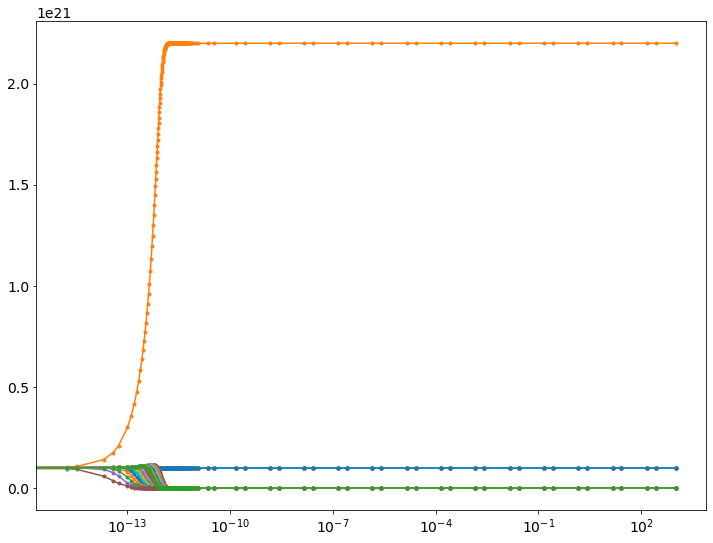

In [25]:
plt.semilogx(sol.t, sol.y.transpose(), marker='.')

In [26]:
sol.y[:,-1]

array([1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 2.1999999999859098e+21,
       -4.257959840008151e-109, 4.060706939705039e-115, 2.537941837315649e-115, 5.075883674631298e-115, 2.0303534698525194e-115,
       4.060706939705039e-115, 1.0151767349262597e-115, 2.537941837315649e-115, 2.0303534698525194e-115, 2.0303534698525194e-115,
       1.2689709186578246e-116, -2.6612249000050942e-110, -7.931068241611404e-118, -1.5862136483222808e-117,
       -3.326531125006368e-111, 6.2372458593869395e-112, 1.5593114648467349e-112, 9.745696655292093e-114, 8.121413879410078e-115,
       -1.0151767349262597e-115, -2.0303534698525194e-115], dtype=object)

In [27]:
coef.set_rate(density=sol.y[:,-1].astype(np.float))

In [28]:
coef.view_dndt()

dndt
CO         0.0e+00
CO(v1)     0.0e+00
CO(v10)    0.0e+00
CO(v2)     0.0e+00
CO(v3)     0.0e+00
CO(v4)     0.0e+00
CO(v5)     0.0e+00
CO(v6)     0.0e+00
CO(v7)     0.0e+00
CO(v8)     0.0e+00
CO(v9)     0.0e+00
CO2       -8.0e-96
CO2(v1)    7.5e-96
CO2(v10) -3.2e-102
CO2(v11)  5.6e-102
CO2(v12) -6.6e-102
CO2(v13)  4.6e-102
CO2(v14) -6.8e-102
CO2(v15)  3.6e-102
CO2(v16) -1.1e-102
CO2(v17)  7.5e-104
CO2(v18) -4.5e-102
CO2(v19) -3.3e-103
CO2(v2)    4.4e-97
CO2(v20) -2.0e-104
CO2(v21)  4.0e-104
CO2(v3)    7.7e-98
CO2(v4)   -9.1e-99
CO2(v5)   -2.9e-99
CO2(v6)  -1.8e-100
CO2(v7)  -1.9e-101
CO2(v8)  -2.2e-102
CO2(v9)   1.3e-101

In [29]:
coef.view_density(density=sol.y[:,-1])

density
CO         1.0e+20
CO(v1)     1.0e+20
CO(v10)    1.0e+20
CO(v2)     1.0e+20
CO(v3)     1.0e+20
CO(v4)     1.0e+20
CO(v5)     1.0e+20
CO(v6)     1.0e+20
CO(v7)     1.0e+20
CO(v8)     1.0e+20
CO(v9)     1.0e+20
CO2        2.2e+21
CO2(v1)  -4.3e-109
CO2(v10)  4.1e-115
CO2(v11)  2.5e-115
CO2(v12)  5.1e-115
CO2(v13)  2.0e-115
CO2(v14)  4.1e-115
CO2(v15)  1.0e-115
CO2(v16)  2.5e-115
CO2(v17)  2.0e-115
CO2(v18)  2.0e-115
CO2(v19)  1.3e-116
CO2(v2)  -2.7e-110
CO2(v20) -7.9e-118
CO2(v21) -1.6e-117
CO2(v3)  -3.3e-111
CO2(v4)   6.2e-112
CO2(v5)   1.6e-112
CO2(v6)   9.7e-114
CO2(v7)   8.1e-115
CO2(v8)  -1.0e-115
CO2(v9)  -2.0e-115